In [ ]:
#Call ONE of the following to import:
%run hide_toggle.ipynb
########OR########
#import import_ipynb
#from hide_toggle import hide_toggle
#hide_toggle()

# Sinusoids: review

In this lesson we'll look at the components of sinusoids, how to graph them, and how to manipulate them.

In [2]:
from IPython.display import Math, Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
#%run hide_toggle.ipynb
#%config InlineBackend.figure_format = 'svg'
matplotlib.rcParams['figure.figsize'] = (8, 4)

### In the context of sound, what does this wave represent? (Or perhaps: what do the values along the x and y axes represent?)

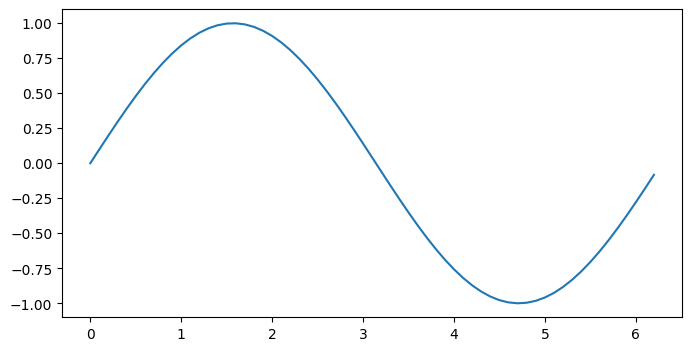

In [4]:
# Change in air pressure over time.  Amplitude over time.
# np.arange builds series of consecutive nums
# Note, np.pi variable and 0.1 increment
x = np.arange(0, 2*np.pi, 0.1)
y = np.sin(x)
plt.plot(x, y)
# We don't have amplitude, rate, periodicity yet.

* When values are above y=0, the pressure of the air increases (air is moving toward you)
* When values are below y=0, the pressure of the air decreases (air is moving away from you)

This change in pressure we refer to as the *amplitude* and is what is plotted on the y-axis. Amplitude is related to loudness. We can think of the relation between amplitude and loudness as similar to the relation between frequency and pitch: One is acoustic, the other is auditory (i.e., perceptual).

Technically, we measure amplitude in volts, pressure, or even just integers: it doesn’t really matter. We just want to be able to look at the overall displacement, or relative position of the values. Typically, we will use integers normalized to the range of between -1 and 1.

A single sinusoid is periodic and symmetrical.
Recall the **period** is the distance from one maximum (or minimum) to the next (or the length of one complete cycle).
**Frequency** is the number of cycles (or periodicity) per second.

**Why does this sine wave not *look* like a sine wave?**

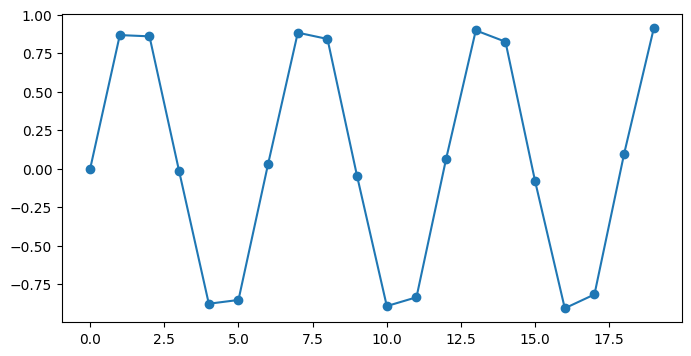

In [5]:
vals = np.linspace(0, 20, 20) # 20 values between 0 and 20
x = np.sin(vals)
plt.plot(x, marker="o")

Let's increase the sampling rate to effectively "increase the resolution" on our sine wave:

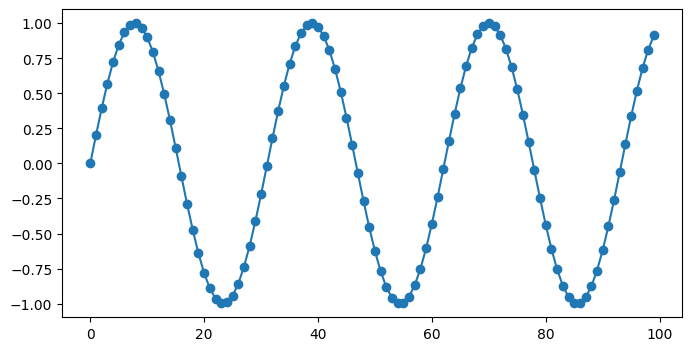

In [6]:
vals = np.linspace(0, 20, 100)
plt.plot(np.sin(vals), marker="o")
# Calculate the needed points

### The Sine Function

Sine is a function for modeling a smooth oscillation between -1 and 1 (unit circle of radius 1). It starts at 0, grows to 1 (the max), through 0 down to -1 (the min) and back to 0.

So sin(x) depends on the value(s) of x. But what does x represent? And where does frequency come in?

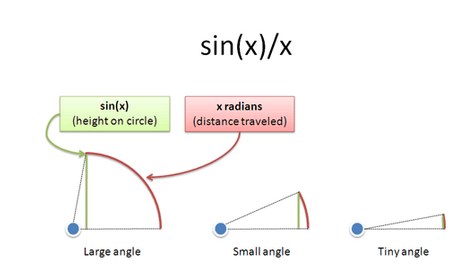

In [7]:
#Taken from suggested reading: https://betterexplained.com/articles/intuitive-guide-to-angles-degrees-and-radians/ 
Image('../images/sinusoids.png', embed=True,   )

In the equation: $sin(x)$ :

    * x is how far you traveled along a unit circle - i.e., circle with radius of 1 - (so x is a distance in radians)
    * sin(x) is your height on the unit circle 

**Recall that the general mathematical form of a single sinusoidal signal is:**

$$x(t) = A sin(\omega_{0}t + \phi)$$

Where $A$ is amplitude, $\omega_{0}$ is frequency in radians/s (radian frequency or angular frequency), t is a time index (usually *array* of time points), and $\phi$ is the phase (or starting angle offset) in radians.

Let's us break it up and have more control. radian freq * time = time

Radians measure angles by distance traveled over time (usually per second unless otherwise stated):

$$Radians = \frac{distance\ traveled}{radius}$$

(So if the radius is 1, then radians simply becomes the distance traveled).

You'll often see this written as "theta equal to arc length over radius", or:

$\theta = \frac{s}{r}$

one radian is about 360 /(2 * $\pi$) or 57.3 degrees

How do we get radian frequency and how does it relate to frequency in Hertz?

It takes 2*pi radians to complete one full cycle (or pi units to go from zero to max; or start to mid-cycle), and frequency is just the number of full cycles per second.


So to move to frequencies, we think of our cycle distance traveled (radians) per second, then we can simply multiply $2pi$ by frequency in Hz (i.e., # of cycles per second):

$2pi *$ [radians/cycle] $* f$ [cycles/second] = $\omega_{0}$ [radians per second]

and Amplitude is simply the size of the radius.

Thus, in radians per second, the frequencies of the first four As on the piano keyboard are:

* 2π x 55 =~ 345 
* 2π × 110 =~ 691
* 2π × 220 =~ 1382
* 2π × 440 =~ 2764


Note: We can identify the two representations of a moment (or single point in) a sine wave through two formulas: a polar formula (which consists of a *magnitude* - r (or radius), and an *angle in radians* - theta), or a rectangular forumla (which is expressed through a complex number), so:
(r, theta) --> (x,y)

$x = a + jb$

or in polar coordinates:

$(r, \theta), where \\
r = (\sqrt{x^2+y^2}) \\
\theta = (\arctan 2\frac{b}{a})$

We won't need to get into this immediately...some of you may already be familiar.

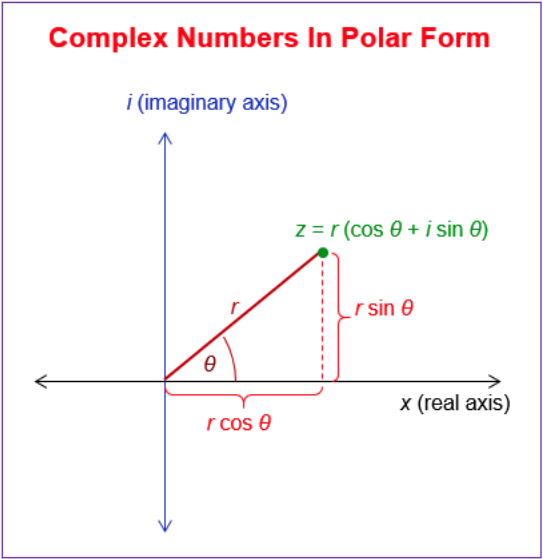

In [8]:
Image('../Images/polarRectangular.png', width=400, embed=True)

## Multi-dimensional data (a bit more numpy)

- Numpy arrays can hold multi-dimensional data. This is useful since audio files typically have multiple channels (i.e., left and right). So when we read in an audio file with 2 channels, we will have a multidimensional array.

- To create a multi-dimensional array, we can pass a list of lists to the `array()` function:

In [10]:
# Make sure it's a full arr here.
x = np.array([[1,2], [3,4]])
x
# z = rcos(theta) + isin(theta)

array([[1, 2],
       [3, 4]])

## Arrays containing arrays

- A multi-dimensional array is an array of an arrays.

- The outer array holds the rows.

- Each row is itself an array:

- So the element in the second row, and first column is:  
(Recall python indexing starts at zero)

## Matrices

- We can also create a matrix from a multi-dimensional array. We won't use matrices much, but this is useful to know, especially for plotting multidimensional data.

In [11]:
# Yes! np is so versatile
M = np.matrix(x)
M
# So I can do vector multiplication

matrix([[1, 2],
        [3, 4]])

## Plotting multi-dimensional data

You can actually pass multiple items to plt.plot:

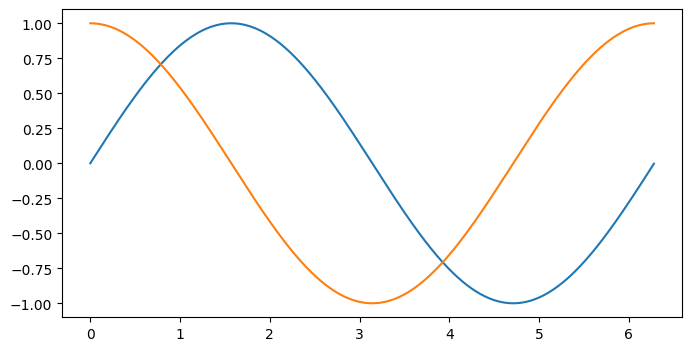

In [13]:
x = np.arange(0, 2*np.pi, 0.01)
plt.plot(x, np.sin(x), x, np.cos(x))
# two args per graph?

Rather than just pass a string of numbers (radians) to `sin` or `cos` function, we can excert greater control over our resulting wave by creating variables that represent the arguments that we will pass to the sin function.

First, let's construct a sinusoid.

So far, we have only been talking about the points of sine at a given angle. However, sine and cosine waves evolve over time. Therefore, it is useful to calculate where we are in the sine (or cosine) cycle at uniform divisions of a time series (e.g., every half second or every 1/100th of a second).

In [15]:
# time arr
t = np.arange(0, 1, 0.01) # one second
freq = 2 # traversals  of unit circle per second
# w = 2pif
w = freq*2*np.pi


Now we have an array of angles (that have been scaled to our desired speed) that we can pass to the `np.sin` function:

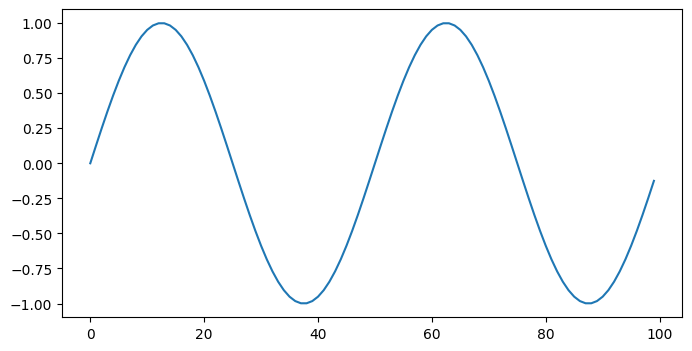

In [17]:
# Asin(wt + phi)
mySine = np.sin(w*t)
plt.plot(mySine)


In this graph above, the phase is 0, the amplitude is 1, the periodicity is 2 (or two complete cycles). Amplitude is a scalar, meaning if we want to *scale* the amplitude, we can multiply the complete output of the `sin` function with some number to augment or shrink the amplitude (i.e., create wider curves)

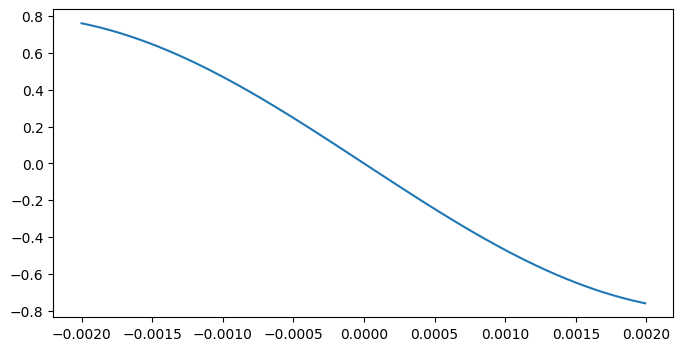

In [19]:
A = 0.8
f = 100 # freq (Hz)
phi = np.pi/2 # arbitrary phase
fs = 44100 # sampling rate
# 1/fs = seconds per sample
t = np.arange(-0.002, 0.002, 1/fs)
x = A * np.cos(2*np.pi*f*t + phi)
plt.plot(t,x)

In [20]:
len(t) # Can't see all of it b/c we don't have enough samples.

177

Since the sampling rate is 44,100 per second, and we have a total of 177 samples, we can figure out that if we wanted to plot a single cycle to fit the number of samples, we need to change the frequency to ???. Change the frequency (above) to [fill in the blank] to see the single cycle.

In [21]:
# By changing frequency 177/fs   fs/177  sample/s / 177 samp/cycle
# w/questions like this, make units make sense
44100 / 177

249.15254237288136

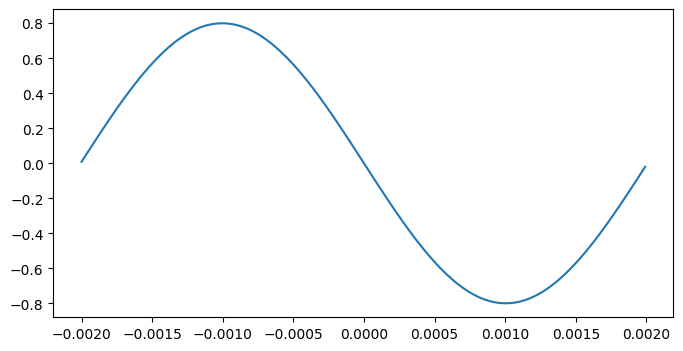

In [22]:
f = fs/x.size
x = A * np.cos(2*np.pi*f*t + phi)
plt.plot(t,x)

What is the difference between a real and complex sinusoid?

Recall that complex numbers have two components or two parts: a real part and an imaginary part. 

So, a *complex* sinusoid contains both the real and imaginary parts.


Recall Euler's identity:

In [26]:
Math(r'e^{j \theta} = cos(\theta) + j sin(\theta)')

<IPython.core.display.Math object>

Multiplying this equation by $ A \geq 0$ and setting $ \theta = \omega t + \phi$, where $ \omega$ is radian frequency,  $ t$ is time in seconds, and $ \phi$ is a phase offset, we obtain what we call the complex sinusoid: 

In [27]:
Math(r'A e^{j(\omega t + \phi)} = A cos(\omega t + \phi) + j A sin(\omega t+\phi)')

<IPython.core.display.Math object>

Thus, the sinusoidal motion $ \cos(\omega t)$ is the projection of the circular motion $ e^{j\omega t}$ onto the $ x$ (real-part) axis, while $ \sin(\omega t)$ is the projection of $ e^{j\omega t}$ onto the $ y$ (imaginary-part) axis. 

In [28]:
N = 500 # num samples
k = 3 # freq
n = np.arange(-N/2, N/2) # time scale. range default 1.
n

array([-250., -249., -248., -247., -246., -245., -244., -243., -242.,
       -241., -240., -239., -238., -237., -236., -235., -234., -233.,
       -232., -231., -230., -229., -228., -227., -226., -225., -224.,
       -223., -222., -221., -220., -219., -218., -217., -216., -215.,
       -214., -213., -212., -211., -210., -209., -208., -207., -206.,
       -205., -204., -203., -202., -201., -200., -199., -198., -197.,
       -196., -195., -194., -193., -192., -191., -190., -189., -188.,
       -187., -186., -185., -184., -183., -182., -181., -180., -179.,
       -178., -177., -176., -175., -174., -173., -172., -171., -170.,
       -169., -168., -167., -166., -165., -164., -163., -162., -161.,
       -160., -159., -158., -157., -156., -155., -154., -153., -152.,
       -151., -150., -149., -148., -147., -146., -145., -144., -143.,
       -142., -141., -140., -139., -138., -137., -136., -135., -134.,
       -133., -132., -131., -130., -129., -128., -127., -126., -125.,
       -124., -123.,

In [30]:
s = np.exp(1j * 2*np.pi * k * n/N)
# j is protected variable? I though protected didn't exist in py. built-in?
# t = n/N sample/total samples = time.

We cannot display a complex sinusoid using a 2D representation, but we can plot the real and imaginary parts separately, or on top of each other.

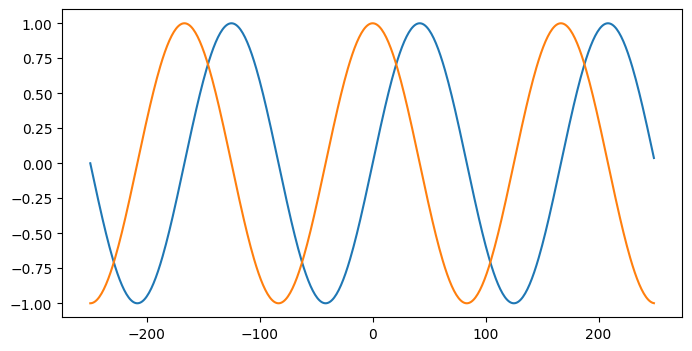

In [31]:
plt.plot(n, np.imag(s), n, np.real(s))

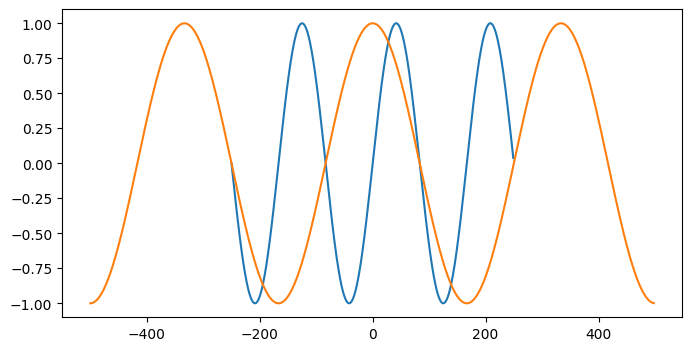

In [33]:
# Note, plot won't let us graph two things at two different time scales.
plt.plot(n, np.imag(s), 2*n, np.real(s))

If you don't have a matrix but have two numpy arrays of the same length, you can plot both in a single call to plot, like this:

## Additive Synthesis

Now that we can build sinusoids, how would we build the classical waveforms?

Remember as long as our numpy arrays are the same size, we can perform arithmetic on them...

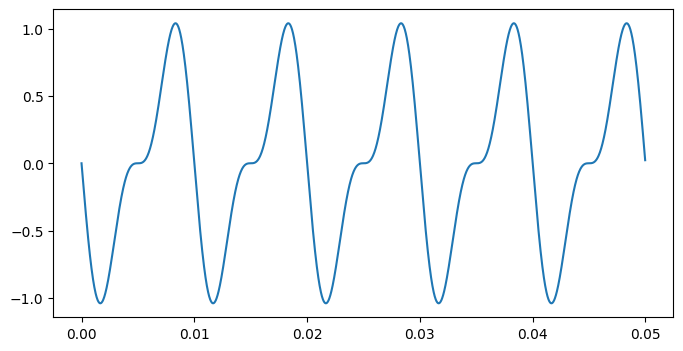

In [36]:
# saw - all harmonics 1/n strength
# triangle - odd harmonics 1/n^2
# square -  odd 1/n
A = 0.8 # amp
f = 100 # freq Hz
phi = np.pi/2
fs = 44100 # sampling rate
t= np.arange(0, 0.05, 1/fs)

sine1 = A * np.cos(2*np.pi*f*t + phi)
sine2 = A/2 * np.cos(2*np.pi*f*t*2 + phi)
combined = sine1 + sine2
plt.plot(t, combined)

We can also combine them using the *optimized* numpy functions. 

Let's build more sinusoids.

In [38]:
# def saw(n):
#     # number harmonics


# looks like np has it built in.
np.stack([sine1, sine2])
# can now add down column
# saw = np.sum(sines, axis=0)
# for now 0 - column 1 - row add across.


Signature:
np.sum(
    a,
    axis=None,
    dtype=None,
    out=None,
    keepdims=<no value>,
    initial=<no value>,
    where=<no value>,
)
Docstring:
Sum of array elements over a given axis.

Parameters
----------
a : array_like
    Elements to sum.
axis : None or int or tuple of ints, optional
    Axis or axes along which a sum is performed.  The default,
    axis=None, will sum all of the elements of the input array.  If
    axis is negative it counts from the last to the first axis.

    .. versionadded:: 1.7.0

    If axis is a tuple of ints, a sum is performed on all of the axes
    specified in the tuple instead of a single axis or all the axes as
    before.
dtype : dtype, optional
    The type of the returned array and of the accumulator in which the
    elements are summed.  The dtype of `a` is used by default unless `a`
    has an integer dtype of less precision than the default platform
    integer.  In that case, if `a` is signed then the platform integer
    is used w

Now what if we were to use functions and loops???